Mounted at /content/drive
Starting results combination process...
Combined 50 experiment results.
Successfully collected all 50 experiment results.


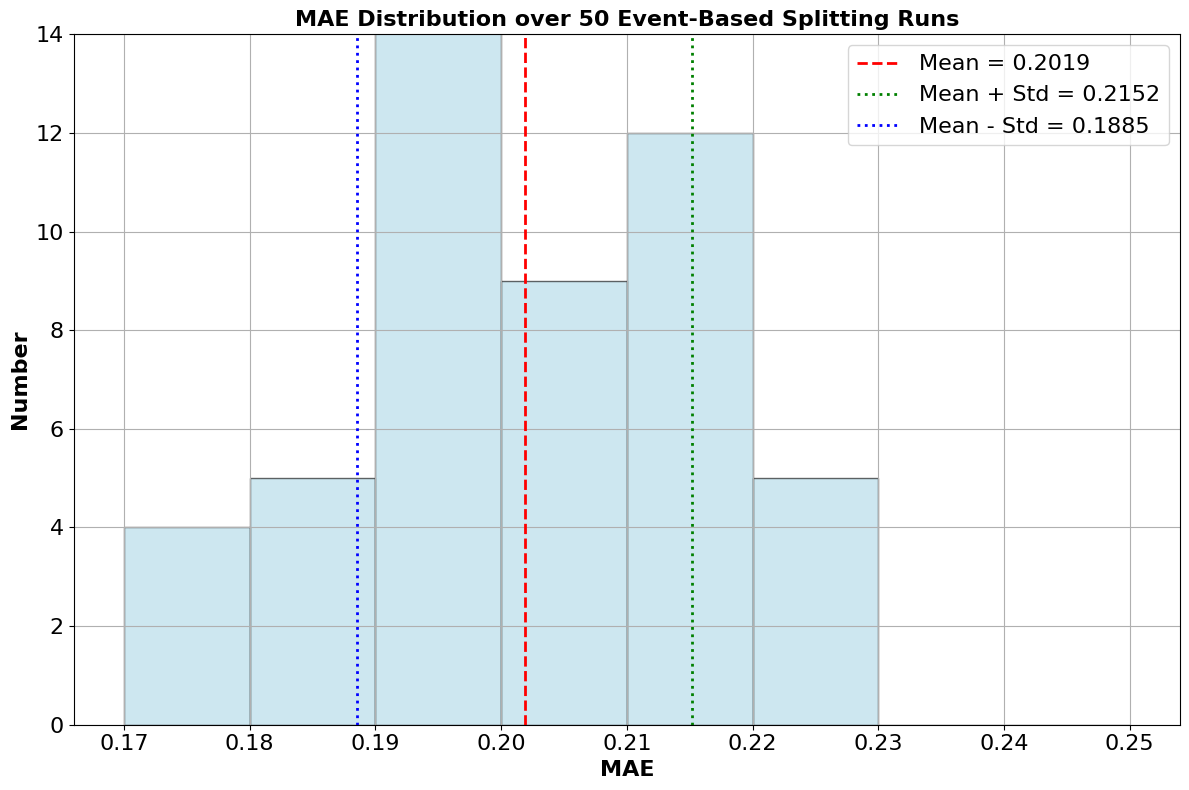

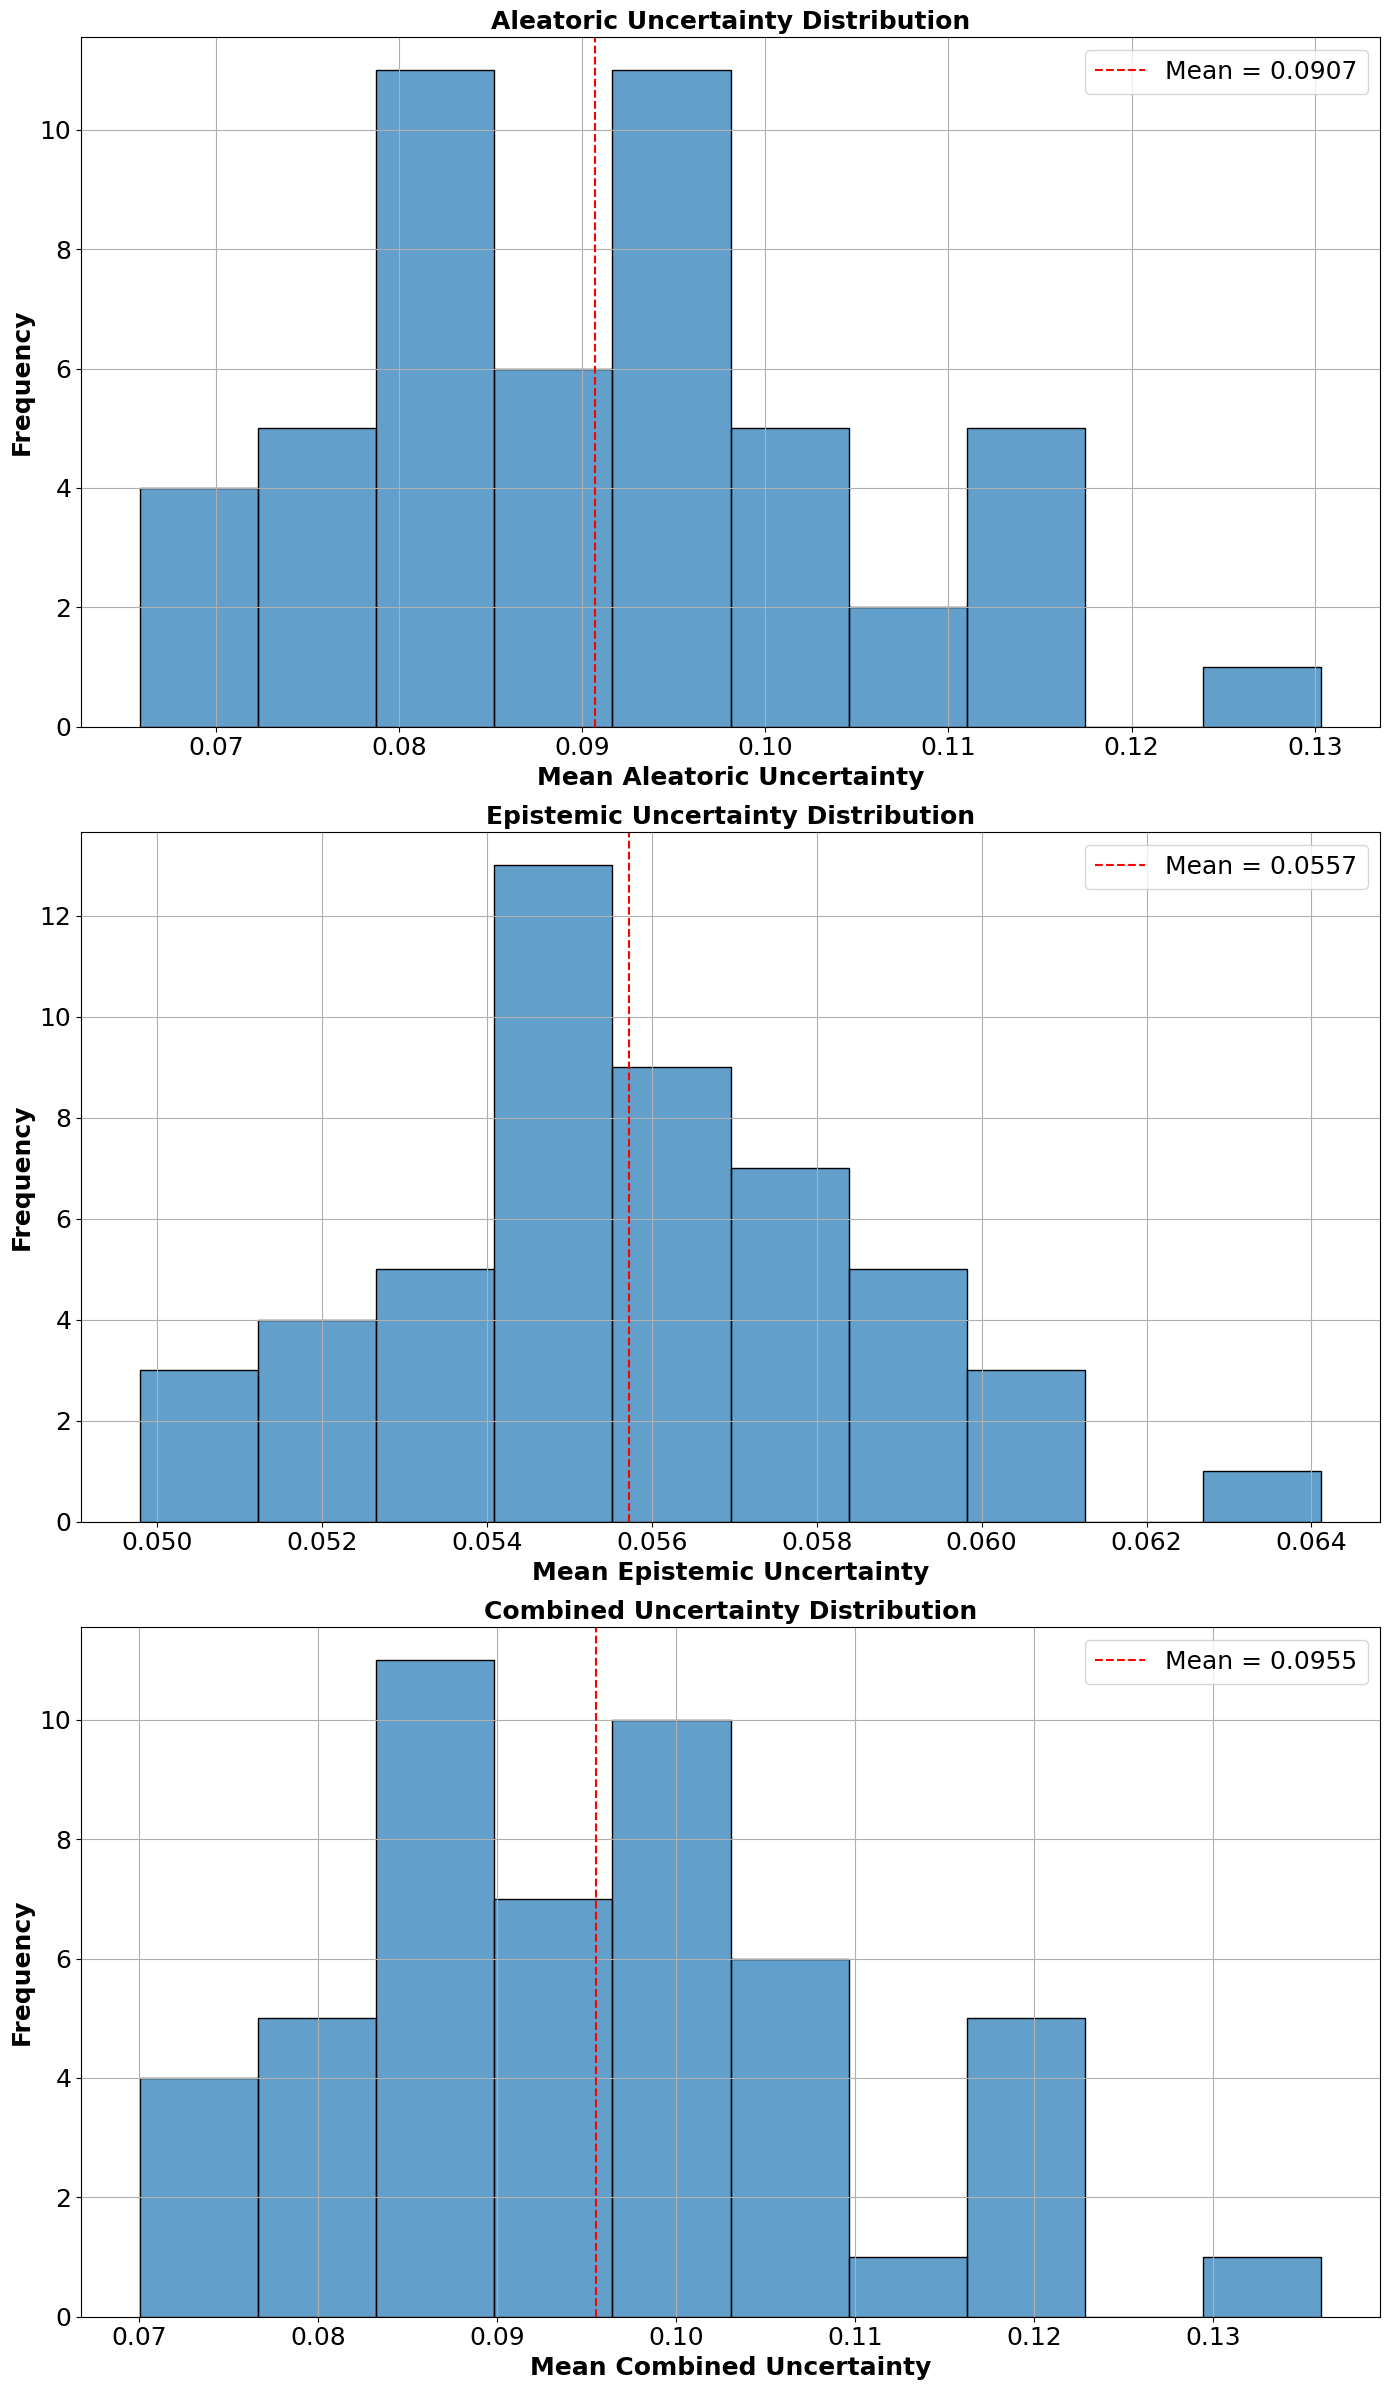


Final Statistics:
Mean MAE: 0.2019
Standard Deviation of MAE: 0.0134
Minimum MAE: 0.1761
Maximum MAE: 0.2290

Visualization completed. Results saved in:
- /content/drive/My Drive/2023-2024/UCL MSc in DSML/Term 3/MSc Project/Code/STEAD_Event_Based/experiment_results/results_50_experiments.json
- /content/drive/My Drive/2023-2024/UCL MSc in DSML/Term 3/MSc Project/Code/STEAD_Event_Based/experiment_results/mae_distribution.png
- /content/drive/My Drive/2023-2024/UCL MSc in DSML/Term 3/MSc Project/Code/STEAD_Event_Based/experiment_results/uncertainty_distributions.png
- /content/drive/My Drive/2023-2024/UCL MSc in DSML/Term 3/MSc Project/Code/STEAD_Event_Based/experiment_results/final_statistics.json


In [ ]:
# -*- coding: utf-8 -*-
"""INSTANCE_Combine_Results.ipynb

This notebook combines the results from both experiment batches and generates
the final visualizations and statistics, just as if all 50 experiments had been
run in a single notebook.
"""

import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive if using Colab
drive.mount('/content/drive')

# Define paths
base_dir = "/content/drive/My Drive/2023-2024/UCL MSc in DSML/Term 3/MSc Project/Code/INSTANCE_Event_Based"
output_dir = os.path.join(base_dir, "experiment_results")
combined_results_file = os.path.join(output_dir, "results_50_experiments.json")

# Helper function to convert numpy types to Python types for JSON serialization
def numpy_to_python(obj):
    """Convert numpy types to Python types for JSON serialization."""
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, dict):
        return {k: numpy_to_python(v) for k, v in obj.items()}
    elif isinstance(obj, list) or isinstance(obj, tuple):
        return [numpy_to_python(i) for i in obj]
    else:
        return obj

def combine_results():
    """
    Combine results from both experiment batches.

    This function loads the two partial results files and combines them into a single
    comprehensive results list, sorted by split_seed.
    """
    # Define the two partial results files
    batch1_file = os.path.join(output_dir, "results_1_to_25.json")
    batch2_file = os.path.join(output_dir, "results_26_to_50.json")

    all_results = []

    # Load batch 1 results
    if os.path.exists(batch1_file):
        with open(batch1_file, 'r') as f:
            batch1_results = json.load(f)
            all_results.extend(batch1_results)
    else:
        print(f"Warning: Results file {batch1_file} not found!")

    # Load batch 2 results
    if os.path.exists(batch2_file):
        with open(batch2_file, 'r') as f:
            batch2_results = json.load(f)
            all_results.extend(batch2_results)
    else:
        print(f"Warning: Results file {batch2_file} not found!")

    # Sort by split_seed to ensure the final results are in the same order as the original code
    all_results.sort(key=lambda x: x['split_seed'])

    # Save the combined results
    with open(combined_results_file, 'w') as f:
        json.dump(all_results, f, indent=4)

    print(f"Combined {len(all_results)} experiment results.")
    return all_results

def generate_visualizations(all_results):
    """
    Generate the same visualizations as in the original code.

    Args:
        all_results: List of results from all experiments
    """
    # Extract metrics
    mae_values = [result['median_mae'] for result in all_results]
    aleatoric_values = [result['median_aleatoric_uncertainty'] for result in all_results]
    epistemic_values = [result['median_epistemic_uncertainty'] for result in all_results]
    combined_values = [result['median_combined_uncertainty'] for result in all_results]

    # Calculate statistics
    mean_mae = np.mean(mae_values)
    std_mae = np.std(mae_values)

    # # Define fixed bins from 0.17 to 0.28 with intervals of 0.01
    # fixed_bins = np.arange(0.17, 0.29, 0.01)  # Upper bound 0.29 to include 0.28

    # Define fixed bins from 0.17 to 0.26 with intervals of 0.01
    fixed_bins = np.arange(0.17, 0.26, 0.01)  # Upper bound 0.26 to include 0.25

    # Plot MAE Distribution
    plt.figure(figsize=(12, 8))
    n, bins, patches = plt.hist(mae_values, bins=fixed_bins, color='lightblue',
                           alpha=0.6, edgecolor='black')

    plt.axvline(mean_mae, color='red', linestyle='dashed', linewidth=2,
                label=f'Mean = {mean_mae:.4f}')
    plt.axvline(mean_mae + std_mae, color='green', linestyle='dotted', linewidth=2,
                label=f'Mean + Std = {(mean_mae + std_mae):.4f}')
    plt.axvline(mean_mae - std_mae, color='blue', linestyle='dotted', linewidth=2,
                label=f'Mean - Std = {(mean_mae - std_mae):.4f}')

    plt.xlabel('MAE', fontsize=16, fontweight='bold')
    plt.ylabel('Number', fontsize=16, fontweight='bold')
    plt.title('MAE Distribution over 50 Event-Based Splitting Runs',
              fontsize=16, fontweight='bold')

    # Set y-axis limit to 14
    plt.ylim(0, 14)

    plt.xticks(fixed_bins, fontsize=16)
    plt.yticks(np.arange(0, 15, 2), fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'mae_distribution.png'))
    plt.show()

    # Plot uncertainty distributions
    fig, axes = plt.subplots(3, 1, figsize=(14, 24))

    # Aleatoric Uncertainty
    sns.histplot(aleatoric_values, bins=10, ax=axes[0], alpha=0.7,
                edgecolor='black')
    axes[0].axvline(np.mean(aleatoric_values), color='red', linestyle='--',
                    label=f'Mean = {np.mean(aleatoric_values):.4f}')
    axes[0].set_title('Aleatoric Uncertainty Distribution',
                      fontsize=18, fontweight='bold')
    axes[0].set_xlabel('Mean Aleatoric Uncertainty', fontsize=18, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=18, fontweight='bold')
    axes[0].tick_params(labelsize=18)
    axes[0].legend(fontsize=18)
    axes[0].grid(True)

    # Epistemic Uncertainty
    sns.histplot(epistemic_values, bins=10, ax=axes[1], alpha=0.7,
                edgecolor='black')
    axes[1].axvline(np.mean(epistemic_values), color='red', linestyle='--',
                    label=f'Mean = {np.mean(epistemic_values):.4f}')
    axes[1].set_title('Epistemic Uncertainty Distribution',
                      fontsize=18, fontweight='bold')
    axes[1].set_xlabel('Mean Epistemic Uncertainty', fontsize=18, fontweight='bold')
    axes[1].set_ylabel('Frequency', fontsize=18, fontweight='bold')
    axes[1].tick_params(labelsize=18)
    axes[1].legend(fontsize=18)
    axes[1].grid(True)

    # Combined Uncertainty
    sns.histplot(combined_values, bins=10, ax=axes[2], alpha=0.7,
                edgecolor='black')
    axes[2].axvline(np.mean(combined_values), color='red', linestyle='--',
                    label=f'Mean = {np.mean(combined_values):.4f}')
    axes[2].set_title('Combined Uncertainty Distribution',
                      fontsize=18, fontweight='bold')
    axes[2].set_xlabel('Mean Combined Uncertainty', fontsize=18, fontweight='bold')
    axes[2].set_ylabel('Frequency', fontsize=18, fontweight='bold')
    axes[2].tick_params(labelsize=18)
    axes[2].legend(fontsize=18)
    axes[2].grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'uncertainty_distributions.png'))
    plt.show()

    # Calculate overall statistics
    print("\nFinal Statistics:")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Standard Deviation of MAE: {std_mae:.4f}")
    print(f"Minimum MAE: {min(mae_values):.4f}")
    print(f"Maximum MAE: {max(mae_values):.4f}")

    # Save final statistics
    with open(os.path.join(output_dir, "final_statistics.json"), 'w') as f:
        json.dump(numpy_to_python({
            'mean_mae': mean_mae,
            'std_mae': std_mae,
            'min_mae': min(mae_values),
            'max_mae': max(mae_values),
            'mean_aleatoric_uncertainty': np.mean(aleatoric_values),
            'mean_epistemic_uncertainty': np.mean(epistemic_values),
            'mean_combined_uncertainty': np.mean(combined_values)
        }), f, indent=4)

    print("\nVisualization completed. Results saved in:")
    print(f"- {combined_results_file}")
    print(f"- {os.path.join(output_dir, 'mae_distribution.png')}")
    print(f"- {os.path.join(output_dir, 'uncertainty_distributions.png')}")
    print(f"- {os.path.join(output_dir, 'final_statistics.json')}")

# Main execution
if __name__ == "__main__":
    print("Starting results combination process...")
    all_results = combine_results()

    if len(all_results) == 50:
        print("Successfully collected all 50 experiment results.")
        generate_visualizations(all_results)
    else:
        print(f"Warning: Only found {len(all_results)} experiment results instead of 50.")
        user_input = input("Do you want to proceed with generating visualizations anyway? (y/n): ")
        if user_input.lower() == 'y':
            generate_visualizations(all_results)
        else:
            print("Visualization canceled. Please check that all experiment notebooks have completed successfully.")